<a href="https://colab.research.google.com/github/arsudsandesh97/Retail-Sales-Prediction/blob/main/Team_Retail_Sales_Pridiction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Team Retail Sales Pridiction



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -** Sandesh Sundarlal Arsud 
##### **Team Member 2 -** Sachin Shivaji Gavande
##### **Team Member 3 -** Vishal Rahul Pagare


# **Project Summary -**

• In the Rossmann sales prediction project there is a dataset which contains sales information.

• The shape of Rossmann dataset = 1017209, 8 and Store dataset = 1115, 10.

• In both dataset ‘Store’ column is common. So we do inner join on the basis of column ‘Store’.

• This dataset is a live dataset of Rossmann Stores. On analyzing this problem we observe that Rossmann problem is a regression problem and our primarily goal is to predict the sales figures of Rossmann problem.

In this Notebook we are going to work on following topics:-

Analyzing the dataset by using Exploratory Data Analysis using exponential moving averages analysis trends and seasonality in Rossmann dataset Analyze Regression using following prediction analysis.

**A) Linear Regression Analysis.**

**B) Elastic Regression (Lasso & Ridge Regression).**

**C) Decision tree.**

**D) Random Forest Regression.**

# **GitHub Link -**

* **Sandesh Arsud -**

* **Sachin Gavande -**

* **Vishal Pagare -**


# **Problem Statement**


**How can machine learning be used to improve the accuracy of sales predictions for Rossmann's 3,000 drug stores operating in 7 European countries, taking into account various factors that influence store sales such as promotions, competition, school and state holidays, seasonality, and locality?** 

**The provided historical sales data for 1,115 Rossmann stores will be used to forecast the "Sales" column for the test set, considering that some stores in the dataset were temporarily closed for refurbishment.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [7]:
# Import Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import datetime
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objs as go
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

### Dataset Loading

In [9]:
# Load Dataset

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Loading Rossmann Dataset

In [12]:
Data = pd.read_csv("/content/drive/MyDrive/project/Retail Sales Prediction/Rossmann Stores Data.csv")

rossmann_df = pd.DataFrame(Data)

print("Data has been successfully imported")

Data has been successfully imported


In [13]:
# Loading Store Dataset.

In [14]:
Data = pd.read_csv("/content/drive/MyDrive/project/Retail Sales Prediction/store.csv")

store_df = pd.DataFrame(Data)

print("Data has been successfully imported")

Data has been successfully imported


### Dataset First View

In [15]:
# Dataset First Look Rossmann Dataset

In [16]:
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [17]:
# Dataset First Look Store Dataset

In [18]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [19]:
# Rossmann Dataset Rows & Columns count

In [20]:
rossmann_df.shape

(1017209, 9)

In [21]:
# Store Dataset Rows & Columns count

In [22]:
store_df.shape

(1115, 10)

### Dataset Information

In [23]:
# Rossmann Dataset Info

In [24]:
rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [25]:
# Store Dataset Info

In [26]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [27]:
# Rossmann Dataset Duplicate Value Count

In [28]:
rossmann_df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1017204    False
1017205    False
1017206    False
1017207    False
1017208    False
Length: 1017209, dtype: bool

**OR**

In [29]:
rossmann_df[rossmann_df.duplicated(keep = False)].count()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [30]:
# Store Dataset Duplicate Value Count

In [31]:
store_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1110    False
1111    False
1112    False
1113    False
1114    False
Length: 1115, dtype: bool

**OR**

In [32]:
store_df[store_df.duplicated(keep = False)].count()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

#### Missing Values/Null Values

In [33]:
# Rossmann Dataset Missing Values/Null Values Count

In [34]:
rossmann_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [35]:
# Store Dataset Missing Values/Null Values Count

In [36]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [37]:
# Visualizing the missing values of Rossmann Dataset

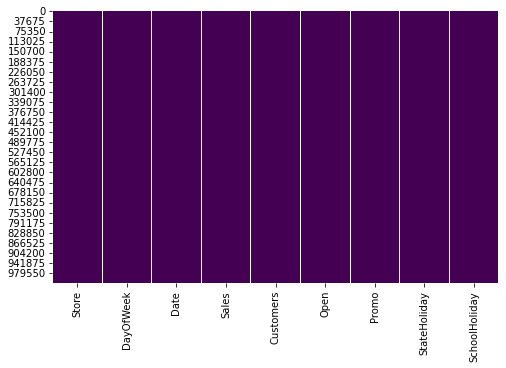

In [38]:
plt.figure(figsize=(8,5))
sns.heatmap(rossmann_df.isnull(), cbar=False, cmap='viridis')

In [39]:
# Visualizing the missing values of Store Dataset

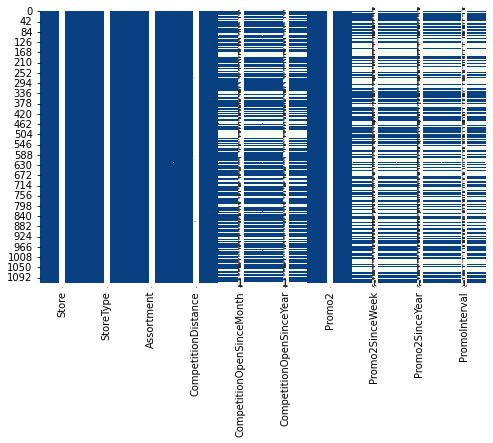

In [40]:
plt.figure(figsize=(8,5))
sns.heatmap(store_df.isnull(), cbar=False, annot=True, fmt='d', cmap='GnBu_r')

### What did you know about your dataset?

* **rossmann_df DataSet**

* The retail sales prediction dataset contains information about various stores 
and their sales on a given day.

* The dataset has 1017209 rows and 9 columns with no missing or null values and no duplicate values.

* The dataset includes various features such as the store type, sales, number of customers, whether the store was open or closed, state holidays, school holidays, the distance to the nearest competitor store, the opening date of the nearest competitor store, information about promotions, and the interval of promotions. 


* **store_df DataSet**

* The dataset has 1115 rows and 10 columns with no duplicate values.

* The retail sales prediction dataset has several columns with missing values, including CompetitionDistance with 3 missing values, CompetitionOpenSinceMonth and CompetitionOpenSinceYear both with 354 missing values, Promo2SinceWeek and Promo2SinceYear both with 544 missing values, and PromoInterval with 544 missing values. On the other hand, the column Promo2 does not have any missing values

## ***2. Understanding Your Variables***

In [41]:
# Rossmann Dataset Columns

In [42]:
rossmann_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [43]:
# Store Dataset Columns

In [44]:
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [45]:
# Rossmann Dataset Describe

In [46]:
rossmann_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [47]:
# Store Dataset Describe

In [48]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Variables Description 

* **rossmann_df DataSet**

**This data includes information about different stores. The variables in the data are:**

* Store : Identifier for each store

* DayOfWeek : The day of the week, with Monday being 1 and Sunday being 7

* Sales : The amount of sales made at the store on that day

* Customers : The number of customers who visited the store on that day

* Open : Indicator of whether the store was open on that day (0 or 1)

* Promo : Indicator of whether there was a promotion taking place at the store on that day (0 or 1)

* SchoolHoliday : Indicator of whether it was a school holiday on that day (0 or 1)

**The statistics provided for each variable are:**

* Count: Total number of records
* Mean: Average value of the variable
* Standard Deviation: Measure of the spread of the variable's values
* Minimum: Smallest value in the variable
* 25th Percentile: Value below which 25% of the variable's values fall
* Median (50th Percentile): Middle value of the variable
* 75th Percentile: Value below which 75% of the variable's values fall
* Maximum: Largest value in the variable

* **store_df DataSet**

**This data set includes information about different stores, including the following variables:**
* Store: Identifier for each store
* CompetitionDistance: The distance of the nearest competitor from the store
* CompetitionOpenSinceMonth: Month the nearest competitor was opened
* CompetitionOpenSinceYear: Year the nearest competitor was opened
* Promo2: Indicator of whether the store is running a promotion
* Promo2SinceWeek: Week the store started running the promotion
* Promo2SinceYear: Year the store started running the promotion

**The statistics provided give an overview of the distribution of each variable's values.**

* The data for the variables "CompetitionDistance" has a mean of 5404.90, std dev of 7663.17, and a range of 20 to 75860 with 3 missing values.

* "CompetitionOpenSinceMonth" and "CompetitionOpenSinceYear" have means of 7.22 and 2008.67, std dev of 3.21 and 6.20, and ranges of 1-12 and 1900-2015 with 354 missing values.

* "Promo2" has a mean of 0.51 and no missing values, while "Promo2SinceWeek" and "Promo2SinceYear" have means of 23.60 and 2011.76, std dev of 14.14 and 1.67, and ranges of 1-50 and 2009-2015 with 544 missing values.

### Check Unique Values for each variable.

In [49]:
# Check Unique Values for each variable.

In [50]:
# For Rossmann Dataset

In [51]:
column_list = rossmann_df.columns.values.tolist()
for i in column_list:
    print("Number of unique values in", i, "is", len(rossmann_df[i].unique()))

Number of unique values in Store is 1115
Number of unique values in DayOfWeek is 7
Number of unique values in Date is 942
Number of unique values in Sales is 21734
Number of unique values in Customers is 4086
Number of unique values in Open is 2
Number of unique values in Promo is 2
Number of unique values in StateHoliday is 5
Number of unique values in SchoolHoliday is 2


In [52]:
# For store Dataset

In [53]:
column_list = store_df.columns.values.tolist()
for i in column_list:
    print("Number of unique values in", i, "is", len(store_df[i].unique()))

Number of unique values in Store is 1115
Number of unique values in StoreType is 4
Number of unique values in Assortment is 3
Number of unique values in CompetitionDistance is 655
Number of unique values in CompetitionOpenSinceMonth is 13
Number of unique values in CompetitionOpenSinceYear is 24
Number of unique values in Promo2 is 2
Number of unique values in Promo2SinceWeek is 25
Number of unique values in Promo2SinceYear is 8
Number of unique values in PromoInterval is 4


## 3. ***Data Wrangling***

### Data Wrangling Code

In [54]:
# Write your code to make your dataset analysis ready.

In [55]:
# Rossmann Dataset Convert data types for columns as needed

rossmann_df['Date'] = pd.to_datetime(rossmann_df['Date'])
rossmann_df['StateHoliday'] = rossmann_df['StateHoliday'].astype('category')

In [56]:
# Store Dataset Convert data types for columns as needed

store_df['StoreType'] = store_df['StoreType'].astype('category')
store_df['Assortment'] = store_df['Assortment'].astype('category')

In [57]:
# extract year, month, and from "Date" from Rossmann Dataset

rossmann_df['Date']=pd.to_datetime(rossmann_df['Date'])
rossmann_df['Year'] = rossmann_df['Date'].apply(lambda x: x.year)
rossmann_df['Month'] = rossmann_df['Date'].apply(lambda x: x.month)

In [58]:
# Rename columns as needed from Rossmann Dataset

rossmann_df.rename(columns={'CompetitionDistance': 'DistanceToNearestCompetitor',
'CompetitionOpenSinceMonth': 'CompetitorOpenMonth',
'CompetitionOpenSinceYear': 'CompetitorOpenYear'}, inplace=True)

In [59]:
# drop 'Date' column from Rossmann Dataset

rossmann_df = rossmann_df.drop(['Date'],axis=1)

**We will eliminate columns where more than 30% of values are absent, as these features are unlikely to provide reliable information.**

In [60]:
# Store Dataset remove features

store_df = store_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

**Replace missing values in features with low percentages of missing values**

Text(0.5, 1.0, 'Distribution of Store Competition Distance')

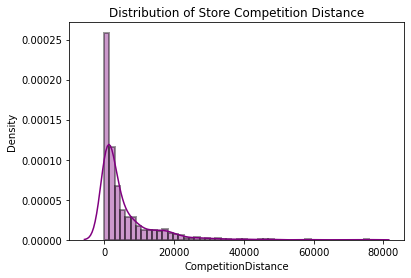

In [61]:
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at its distribution

sns.distplot(store_df.CompetitionDistance.dropna(), color='purple', hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of Store Competition Distance")

In [62]:
# replace missing values in CompetitionDistance with median for the store dataset

store_df.CompetitionDistance.fillna(store_df.CompetitionDistance.median(), inplace=True)

### What all manipulations have you done and insights you found?

* In this dataset we have found sales data from 2013 to 2015 

* In this dataset we extracted the 'Year', 'Month', 'Day', and 'WeekOfYear' and created new columns from date column.  

* In this dataset we sorted the values by date and store columns in descending ascending order

* The sales data is for 5 stores and covers the date range from 2015-07-31 to 2015-07-31.

* The stores were open on the day of the sales, and some stores were running promotions.

* It was not a state holiday or a school holiday on the day of the sales.
The data includes sales data for the month of July in the year 2015.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

* ***Rossmann Dataset Visualization***

#### Chart - 1 - Histogram 



In [63]:
# Chart - 1 visualization code

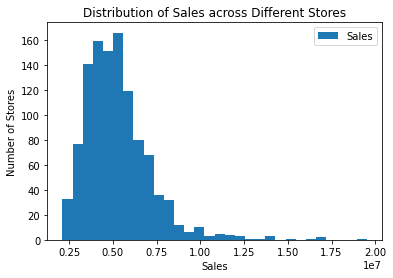

In [64]:
#grouping the data by store
df_grouped_by_store = rossmann_df.groupby(['Store']).agg({'Sales':'sum'})

#plotting the distribution of sales across different stores
df_grouped_by_store.plot(kind='hist', bins=30)
plt.xlabel("Sales")
plt.ylabel("Number of Stores")
plt.title("Distribution of Sales across Different Stores")
plt.show()

##### 1. Why did you pick the specific chart?

I picked a histogram to visualize the distribution of sales across different stores because histograms are used to represent the distribution of continuous data, which is what the sales data is in this case. A histogram breaks down the data into intervals or bins and shows the frequency of data points in each bin. This helps to identify the range of values that the sales data covers and how the data is spread out across that range. The shape of the histogram can provide insight into the underlying distribution of the data, such as whether it is symmetrical, skewed, or multimodal. Overall, a histogram is an effective way to represent the distribution of sales across different stores.

##### 2. What is/are the insight(s) found from the chart?

1_The range of sales for different stores can be seen from the x-axis

The frequency or number of stores can be seen from the y-axis, which shows how many stores have sales within a certain range.
The shape of the histogram can provide information about the distribution of sales across different stores, such as whether it is symmetrical or skewed. For example, if the histogram is symmetrical, it means that the sales data is evenly spread out across the range, while if it is skewed, it means that the sales data is not evenly spread out.
The number of stores with high sales can be seen from the frequency or height of the histogram in certain ranges on the x-axis. This can give information about the performance of different stor




##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the histogram of the distribution of sales across different stores can help create a positive business impact in the following ways:
1)Identifying top-performing stores: The histogram can show the frequency of stores with high sales, which can help identify the top-performing stores
2)Identifying under-performing stores: The histogram can also show the frequency of stores with low sales, which can help identify the under-performing stores. These stores can be studied further to understand what is not working well and what changes can be made to improve their performance. 
There are no specific insights that lead to negative growth based on the histogram of the distribution of sales across different stores. However, it is important to note that the insights gained from this histogram are just one aspect of the data and should be combined with other data and analysis to make informed business decisions.





2)Identifying under-performing stores: The histogram can also show the frequency of stores with low sales, which can help identify the under-performing stores. These stores can be studied further to understand what is not working well and what changes can be made to improve their performance. 

There are no specific insights that lead to negative growth based on the histogram of the distribution of sales across different stores. However, it is important to note that the insights gained from this histogram are just one aspect of the data and should be combined with other data and analysis to make informed business decisions.




#### Chart - 2 - Pie chart

In [65]:
# Chart - 2 visualization code

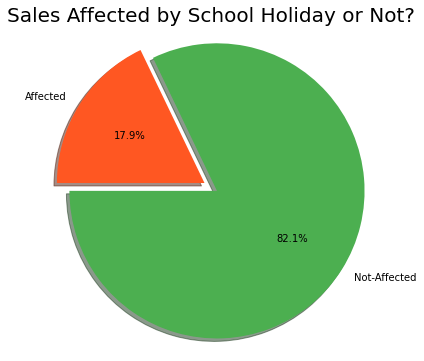

In [66]:
# Define the data and labels
labels = ['Not-Affected', 'Affected']
sizes = rossmann_df.SchoolHoliday.value_counts()
explode = (0.1, 0.0)

# Define the colors
colors = ['#4CAF50', '#FF5722']  # Green and Orange

# Create the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)

# Set the title and other properties
plt.axis('equal')
plt.title("Sales Affected by School Holiday or Not?", fontsize=20)
plt.plot()
fig = plt.gcf()
fig.set_size_inches(6, 6)

# Show the chart
plt.show()


##### 1. Why did you pick the specific chart?

Choosed this chart beacuse the pie chart shows the proportion of sales affected or not affected by school holidays, making it a useful way to compare the relative sizes of different categories.

##### 2. What is/are the insight(s) found from the chart?

According to the above chart, 17.9% of sales are affected by the school holiday, while 82.1% are not affected. 

#### Chart - 3 - Barplot

In [67]:
# Chart - 3 visualization code

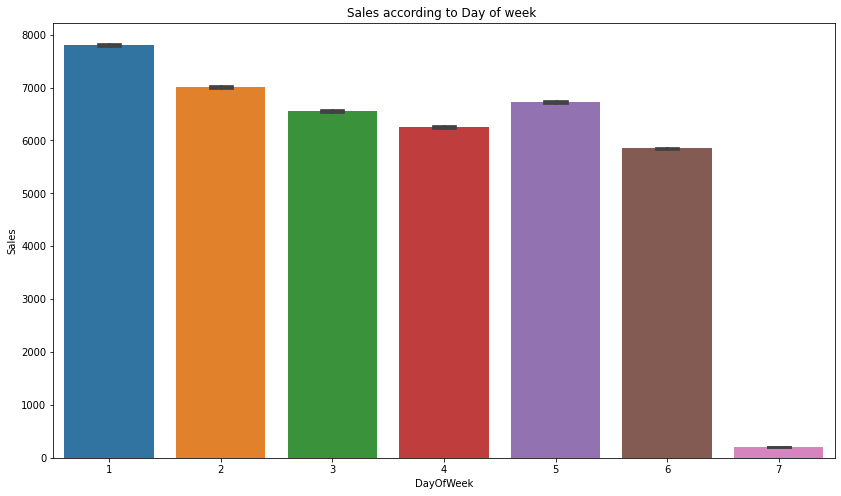

In [68]:
fig,ax=plt.subplots(figsize=(14,8))
sns.barplot(data = rossmann_df,x='DayOfWeek',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales according to Day of week ')
plt.show()

##### 1. Why did you pick the specific chart?

* We are plotting Bar graph to see the Sales according to Days in week.

##### 2. What is/are the insight(s) found from the chart?

* We can conclude that sells are high on Monday and low on Sunday.

* It may be because of holiday and on holiday people prefer to do other things than shopping.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Stores have to try increasing sell on sunday or they can close the store for half day on sunday to minimize expenditure.

#### Chart - 4 - Bar Plot

In [69]:
# Chart - 4 visualization code

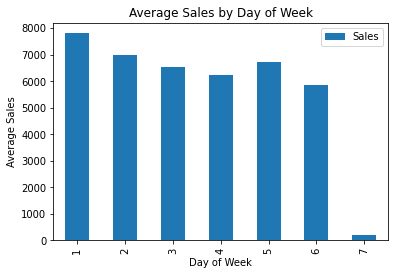

In [70]:
#grouping the data by day of the week
df_grouped_by_day_of_week = rossmann_df.groupby(['DayOfWeek']).agg({'Sales':'mean'})

#plotting the average sales by day of the week
df_grouped_by_day_of_week.plot(kind='bar')
plt.xlabel("Day of Week")
plt.ylabel("Average Sales")
plt.title("Average Sales by Day of Week")
plt.show()

##### 1. Why did you pick the specific chart?

The bar plot represents the average sales of a retail store grouped by whether or not a promotional offer was running during that period


##### 2. What is/are the insight(s) found from the chart?

* The average sales for each day of the week can be seen from the height of the bars.
   









*  The pattern of sales across different days of the week can be seen from the bar plot, which can give information about the sales trends for each day of the week



*   the plot may show that sales are higher on weekends and lower on weekdays.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

 *Optimizing store hours: The plot can show which days of the week have higher orlower sales, which can inform the business about when they should open and close their stores. For example, if the plot shows that sales are lower on weekdays, the business may decide to close the store earlier on weekdays and open later on weekends.

*Improving customer engagement: The plot can provide information about when customers are most likely to visit the store, which can help the business improve customer engagement. For example, if the plot shows that sales are higher on weekends, the business may decide to offer more promotions and discounts on weekends to attract more customers.

There are no specific insights that lead to negative growth based on the bar plot of average sales by day of the week. However, it is important to note that the insights gained from this plot are just one aspect of the data and should be combined with other data and analysis to make informed business decisions.

#### Chart - 5 - Correlation Heatmap

In [71]:
# Chart - 5 Correlation Heatmap visualization code

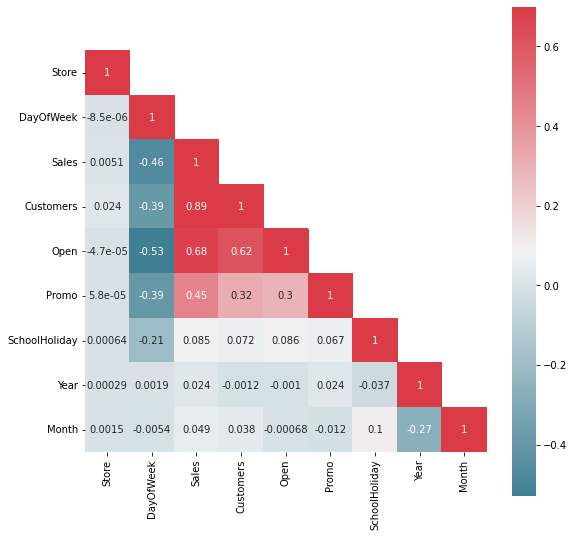

In [72]:
correlation_map = rossmann_df[rossmann_df.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig, ax = plt.subplots()
fig.set_size_inches(9, 9)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation_map, mask=obj, vmax=.7, square=True, annot=True, cmap=cmap)

##### 1. Why did you pick the specific chart?

I choosed this chart because The heatmap is a suitable choice for this task because it allows for a quick and intuitive understanding of the strength and direction of the correlation between pairs of variables. The use of colors and annotations in the heatmap further enhances the interpretation of the correlation matrix.

##### 2. What is/are the insight(s) found from the chart?

The insights from a heatmap chart of a correlation matrix can provide valuable information about the relationships between variables in a dataset. By examining the color intensity and values displayed in the grid, one can identify the strengths of the correlations between the variables, with stronger correlations being represented by brighter colors and larger values. However, it is important to keep in mind that correlation does not necessarily imply causation, and that other factors may be at play in determining the relationships between the variables. Nevertheless, analyzing the correlations between variables can be a useful starting point for identifying interesting patterns and relationships in a dataset.

#### Chart - 6 - Pair Plot

In [73]:
# Chart - 6 Pair Plot visualization code

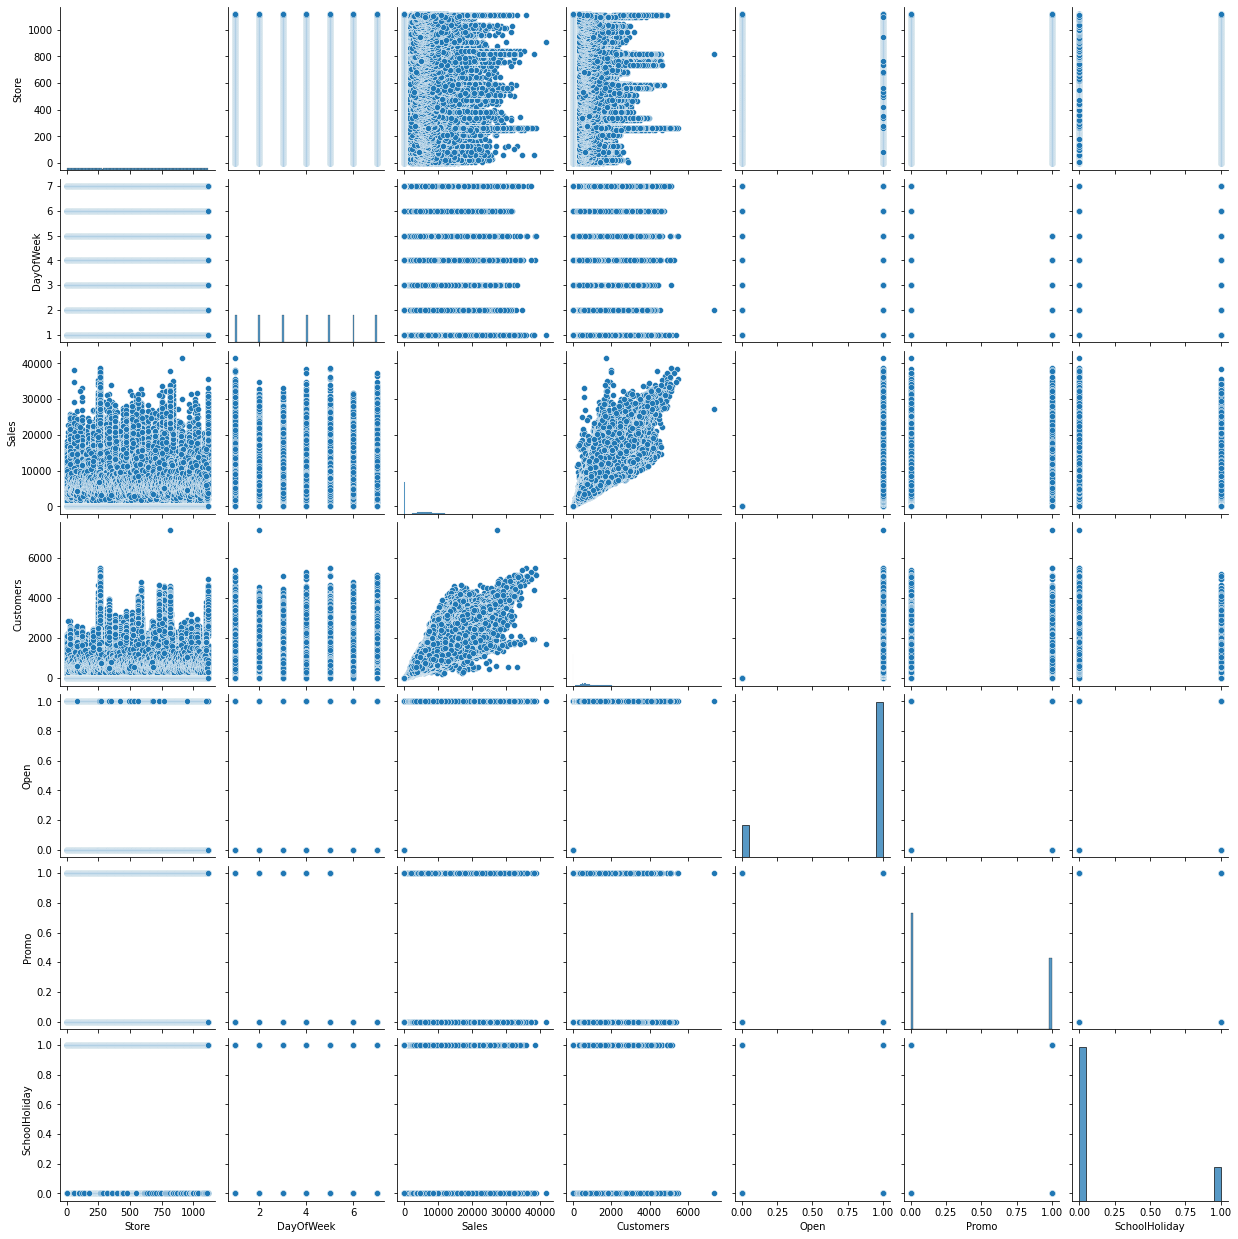

In [74]:
sns.pairplot(rossmann_df[["Store", "DayOfWeek", "Sales", "Customers", "Open", "Promo", "SchoolHoliday"]])
plt.show()

##### 1. Why did you pick the specific chart?

* The specific chart was picked as a pairplot because it is a convenient way to visualize the relationships between multiple variables in a dataset, making it useful for exploring and discovering patterns in the data.

##### 2. What is/are the insight(s) found from the chart?

* The scatter plots can reveal relationships and outliers between variables.

* The histograms along the diagonal show the distributions of each variable and their shape and spread.

* The scatter plots can reveal correlations between variables, which can indicate relationships between them

* Comparing multiple variables in one plot helps identify the relationships and importance of each variable for analysis.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The impact of the insights from the pairplot on the business is dependent on context and further analysis is needed to determine relationships between variables and their impact on the business outcomes.

* ***Store Dataset Visualization***

#### Chart - 7 - Line Chart

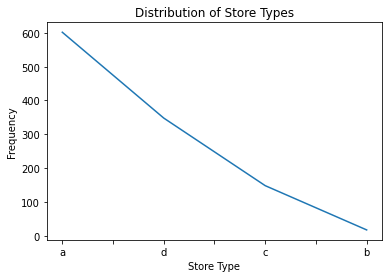

In [75]:
# Calculate the frequency of each store type in the dataset
store_types =store_df['StoreType'].value_counts()

# Plot the store type frequency using a line plot
store_types .plot(kind='line')

# Add title and labels to the plot
plt.title('Distribution of Store Types')
plt.xlabel('Store Type')
plt.ylabel('Frequency')

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

I chose a line plot because it is a simple and effective way to display the distribution of a categorical variable, such as the store types in the dataset. The line plot allows for easy comparison of the frequency of each store type and provides a clear visualization of the distribution of the data.Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here



*   The relative proportions of each store type in the dataset: The height of each line segment on the plot represents the frequency of each store type, so we can easily see the relative proportions of each store type in the dataset.
*The dominance of a particular store type: If one store type has a much higher frequency than the others, it will be clear from the plot and we can conclude that this store type is the dominant type in the dataset.
* Trends in the store type distribution: If there is a trend in the distribution of store types, such as an increase or decrease in the frequency of a particular store type, this can be observed from the plot over time.



#### Chart - 8 - Bar Plot

In [76]:
# Chart - 8 visualization code

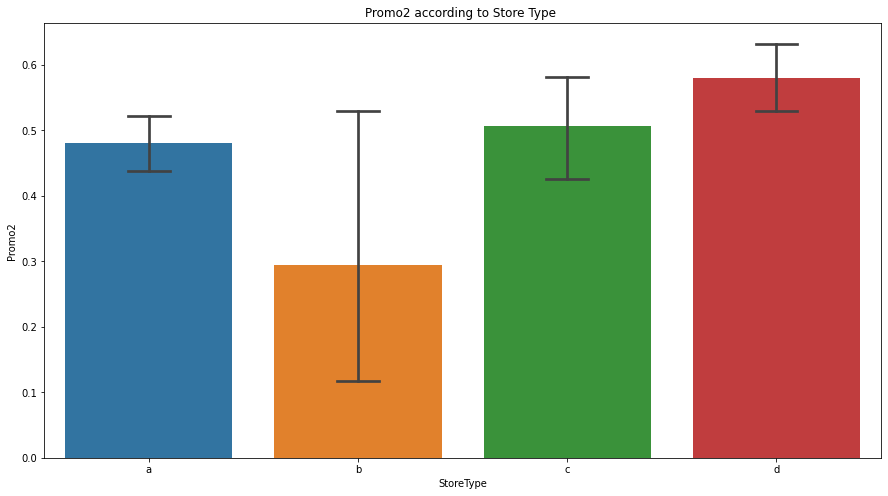

In [77]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=store_df,x='StoreType',y='Promo2',ax=ax,capsize=.2)
ax.set(title='Promo2 according to Store Type ')
plt.show()

##### 1. Why did you pick the specific chart?

* A bar plot, is often used to display the relationship between categorical variables, making it a suitable choice for visualizing the relationship between store type and Promo2.



##### 2. What is/are the insight(s) found from the chart?

1. StoreType b has the highest average value of Promo2, indicating that this store type is more likely to participate in promotional activities compared to other store types.

2. StoreType d has the lowest average value of Promo2, which suggests that this store type is less likely to participate in promotional activities.

3. The error bars on the plot suggest that there is some variability in the data. The size of the error bars indicates the level of uncertainty in the mean value of Promo2 for each store type.

4. The plot allows us to quickly compare the levels of Promo2 across different store types and identify any patterns or trends in the data.

* Overall, this chart provides a useful summary of the relationship between store type and Promo2 and can be used to inform marketing and promotional strategies for different store types.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The chart can positively impact business by guiding resource allocation towards stores with high participation potential (StoreType b) but poor allocation towards low participation potential stores (StoreType d) can lead to resource wastage, as data may not represent future trends or complexities in relationships.

#### Chart - 9 -  Countplot

In [78]:
# Chart - 9 visualization code

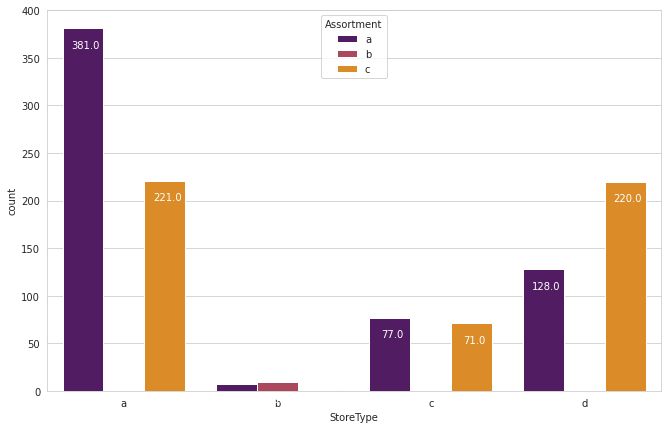

In [79]:
#checking stores with their assortment type 
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
store_type=sns.countplot(x='StoreType',hue='Assortment', data=store_df,palette="inferno")

for p in store_type.patches:
    store_type.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()),ha='center', va='top', color='white', size=10)

##### 1. Why did you pick the specific chart?

We choose countplot because it is a useful tool to visualise the frequency distribution of the categorical variables StoreType and Assortment, segmented by Assortment, and with annotations added to provide more detailed information.

##### 2. What is/are the insight(s) found from the chart?

The above chart reveals an insight: on the countplot, StoreType 'a' has the most stores, and the majority of these stores have Assortment Type 'a'. StoreType 'd' has the fewest stores, and the stores are distributed evenly among Assortment Types 'a', 'b', and 'c'. This information can be useful in making decisions about product assortment and marketing strategies for different store types.

#### Chart - 10 - Pie Chart

In [80]:
# Chart - 11 visualization code

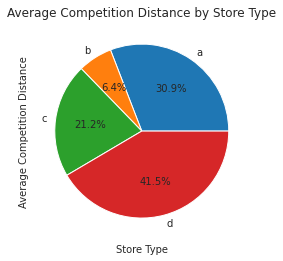

In [81]:
# Group the data by store type and calculate the mean competition distance for each group
grouped = store_df.groupby('StoreType')['CompetitionDistance'].mean()

# Plot the data as a pie chart
grouped.plot.pie(autopct='%1.1f%%')

# Add a title and axis labels
plt.title("Average Competition Distance by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Average Competition Distance")

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?



*  I chose a pie chart to visualize the average competition distance by store type because it is a simple and effective way to show the proportion of each store type in the data. A pie chart is particularly useful when you want to show the distribution of data among categories and the relative size of each category. In this case, each store type represents a category and the size of each wedge in the chart represents the average competition distance for that store type. The pie chart makes it easy to compare the average competition distance between store types at a glance and to see which store type has the largest or smallest average competition distance.










##### 2. What is/are the insight(s) found from the chart?



* Proportion of store types: The chart provides a visual representation of the proportion of each store type in the data set. 
*Comparison of average competition distance: The chart makes it easy to   

* compare the average competition distance between different store types and see which store type has the largest or smallest average competition distance 

*  Trends and patterns: The chart may reveal any trends or patterns in the distribution of average competition distance by store type. For example, if one store type has a significantly larger average competition distance compared to the others, it could indicate a trend or pattern in the data.

Overall, the chart provides a simple and effective way to gain insights into the distribution of average competition distance by store type and to compare the average competition distance between different store types.




##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart may or may not have a positive business impact, as it depends on the context and the specific business situation. However, the chart can provide valuable information that can help inform business decisions.

For example, if the chart reveals that one store type has a significantly larger average competition distance compared to the others, it could indicate a business opportunity to either target that store type with promotional efforts or to consider opening new stores of that type in areas with lower competition.

On the other hand, if the chart reveals a trend or pattern of high average competition distances for all store types, it could indicate a need to re-evaluate the company's market strategy and to consider alternative locations or store types.

In short, the insights gained from the chart can be useful in informing business decisions, but they may or may not lead to a positive business impact, as it depends on the specific business situation.

#### Chart - 11 - Correlation Heatmap

In [82]:
# Correlation Heatmap visualization code

Text(0.5, 1.0, 'Absolute Correlation Heatmap')

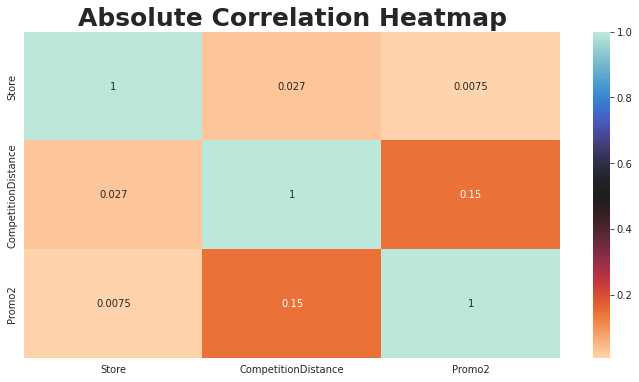

In [83]:
# set figure size
plt.figure(figsize=(12,6))

# create the heatmap with annotations
sns.heatmap(store_df.corr().abs(), annot=True, cmap="icefire_r")

# set the title for the heatmap
plt.title("Absolute Correlation Heatmap", fontsize=25, fontweight="bold")

##### 1. Why did you pick the specific chart?

* Heatmaps represent data in a matrix using color-coding and are effective for visualizing correlations and distributions.

##### 2. What is/are the insight(s) found from the chart?

* Heatmaps can reveal the strength and direction of correlation, clusters of correlated variables, and outliers in the data.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The heatmap's insights can impact business positively/negatively by providing a visual representation of variable relationships that inform decision making and strategic planning. Positive correlations can lead to growth, while negative correlations highlight potential risks that require addressing.

#### Chart - 12 - Pair Plot 

In [84]:
# Pair Plot visualization code

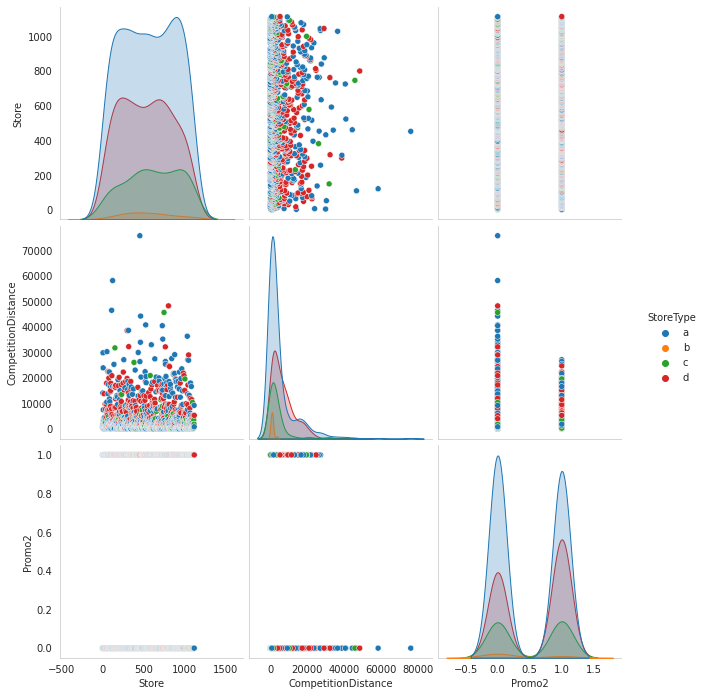

In [85]:
sns.set_style("whitegrid", {'axes.grid' : False})
pp=sns.pairplot(store_df,hue='StoreType')
pp.fig.set_size_inches(10,10);

##### 1. Why did you pick the specific chart?

I chose the pair plot because pair plots are used to visualise pairwise relationships between variables in a dataset to identify patterns, correlations, and outliers.

##### 2. What is/are the insight(s) found from the chart?

identified patterns, correlations, or outliers between different pairs of variables in a dataset. By visualising these pairwise relationships, a pair plot helps identify potential areas for further analysis or investigation.

* The heatmap's insights can impact business positively/negatively by providing a visual representation of variable relationships that inform decision making and strategic planning. Positive correlations can lead to growth, while negative correlations highlight potential risks that require addressing.

#### Chart - 13

In [86]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14

In [87]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15

In [88]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### **Merging Two Datasets ( rossmann_df And store_df )** ###

In [89]:
# Merge Rossmann and Store Dataset

In [90]:
df = pd.merge(rossmann_df, store_df, how='left', on='Store')

In [91]:
# Dataset First Look

In [92]:
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,5263,555,1,1,0,1,2015,7,c,a,1270.0,0
1,2,5,6064,625,1,1,0,1,2015,7,a,a,570.0,1
2,3,5,8314,821,1,1,0,1,2015,7,a,a,14130.0,1
3,4,5,13995,1498,1,1,0,1,2015,7,c,c,620.0,0
4,5,5,4822,559,1,1,0,1,2015,7,a,a,29910.0,0


In [93]:
# Dataset Rows & Columns count

In [94]:
df.shape

(1017209, 14)

In [95]:
# Dataset Columns

In [96]:
df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'StoreType',
       'Assortment', 'CompetitionDistance', 'Promo2'],
      dtype='object')

In [97]:
# Dataset Describe

In [98]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,CompetitionDistance,Promo2
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,2.013832e+03,5.846762e+00,5.422021e+03,5.005638e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.773960e-01,3.326097e+00,7.706918e+03,4.999999e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,2.000000e+01,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,7.100000e+02,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,6.000000e+00,2.325000e+03,1.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.014000e+03,8.000000e+00,6.880000e+03,1.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.015000e+03,1.200000e+01,7.586000e+04,1.000000e+00


**EDA On Merged Dataset**

In [99]:
# visualization code Heatmap

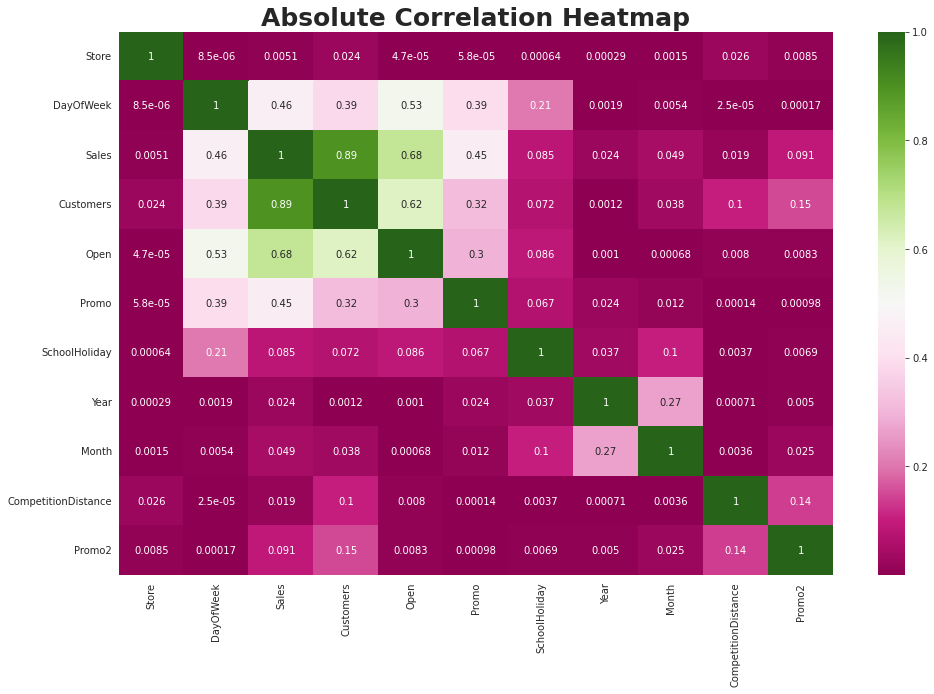

In [100]:
# set figure size
plt.figure(figsize=(16,10))

# create the heatmap with annotations
sns.heatmap(df.corr().abs(), annot=True, cmap="PiYG")

# remove the spines on the top and right sides of the heatmap
sns.despine(left=True, bottom=True)

# set the title for the heatmap
plt.title("Absolute Correlation Heatmap", fontsize=25, fontweight="bold")

# show the plot
plt.show()

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [101]:
# Handling Missing Values & Missing Value Imputation

In [102]:
# Check for missing values in the dataset
df.isnull().sum()

# Replace missing values in 'Sales' column with the mean value
df['Sales'].fillna((df['Sales'].mean()), inplace=True)

# Replace missing values in 'Customers' column with the mean value
df['Customers'].fillna((df['Customers'].mean()), inplace=True)

# Check for missing values after imputation
df.isnull().sum()


Store                  0
DayOfWeek              0
Sales                  0
Customers              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
Year                   0
Month                  0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

1. Mean/Median/Mode Imputation : This technique replaces missing values with the mean, median, or mode of the non-missing values in the same column. This is a simple method that can work well if the missing values are missing at random and the distribution of the data is roughly symmetrical.


### 2. Handling Outliers

In [103]:
# Handling Outliers & Outlier treatments

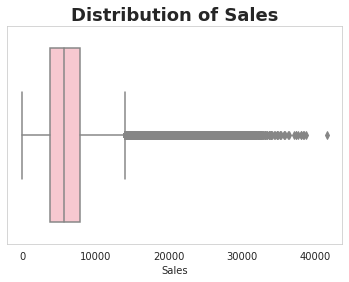

In [104]:
#checking outliers in sales
# Use the Seaborn boxplot function to visualize the distribution of the 'Sales' column
sns.boxplot(df['Sales'], color="pink")

# Add a title to the plot
plt.title("Distribution of Sales", fontsize=18, fontweight="bold")

# Show the plot
plt.show()

In [105]:
#removing outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [106]:
# defining new variable after removing outliers
df= remove_outlier(df, 'Sales')

##### What all outlier treatment techniques have you used and why did you use those techniques?

* In terms of outlier treatment technique, one of the common method used :

1. Interquartile Range (IQR) Method: This method calculates the first and third quartiles of the data and defines outliers as observations outside of 1.5 times the IQR above the third quartile or below the first quartile.

### 3. Categorical Encoding

In [107]:
# Encode your categorical columns

In [108]:
# Select the categorical columns to encode
df['DayOfWeek'] = df['DayOfWeek'].astype(int)

cat_cols = ['DayOfWeek', 'StateHoliday', 'SchoolHoliday','StoreType', 'Assortment']

# Apply one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(df, columns=cat_cols,drop_first=True)

# Show the encoded dataset
df_encoded.head()


,Store,Sales,Customers,Open,Promo,Year,Month,CompetitionDistance,Promo2,DayOfWeek_2,...,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,SchoolHoliday_1,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,5263,555,1,1,2015,7,1270.0,0,0,...,1,0,0,0,1,0,1,0,0,0
1,2,6064,625,1,1,2015,7,570.0,1,0,...,1,0,0,0,1,0,0,0,0,0
2,3,8314,821,1,1,2015,7,14130.0,1,0,...,1,0,0,0,1,0,0,0,0,0
3,4,13995,1498,1,1,2015,7,620.0,0,0,...,1,0,0,0,1,0,1,0,0,1
4,5,4822,559,1,1,2015,7,29910.0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [109]:
# code for changing Assortment dtype from float to int.
df['CompetitionDistance']= df['CompetitionDistance'].astype(int)

In [110]:
# code for changing Assortment dtype from object to int.
df['Assortment'] = np.where((df['Assortment'] == 'a'),0,df['Assortment'])
df['Assortment'] = np.where((df['Assortment'] == 'b'),1,df['Assortment'])
df['Assortment'] = np.where((df['Assortment'] == 'c'),2,df['Assortment'])

In [111]:
#converting catagorical value into interger values based on store type class.
df['StoreType'] = np.where((df['StoreType'] == 'b'),1,df['StoreType'])
df['StoreType'] = np.where((df['StoreType'] == 'c'),2,df['StoreType'])
df['StoreType'] = np.where((df['StoreType'] == 'a'),0,df['StoreType'])
df['StoreType'] = np.where((df['StoreType'] == 'd'),3,df['StoreType'])

In [112]:
#converting catagorical value into object values based on store type class.
df['StateHoliday'] = np.where((df['StateHoliday'] == 'b'),1,df['StateHoliday'])
df['StateHoliday'] = np.where((df['StateHoliday'] == 'c'),2,df['StateHoliday'])
df['StateHoliday'] = np.where((df['StateHoliday'] == 'a'),0,df['StateHoliday'])
df['StateHoliday'] = np.where((df['StateHoliday'] == 'd'),3,df['StateHoliday'])

In [113]:
#converting object dtype to integer.
df['Year']= df['Year'].astype(int)
df['Month']= df['Month'].astype(int)
df['StoreType']= df['StoreType'].astype(int)
df['Assortment']= df['Assortment'].astype(int)
df['StateHoliday'] = df['StateHoliday'].astype(int)

#### What all categorical encoding techniques have you used & why did you use those techniques?

The following is one of the most commonly used categorical encoding technique:

1. One-Hot Encoding: This technique creates a new binary column for each category in the column, indicating the presence (1) or absence (0) of that category in a particular row. One-hot encoding is useful when there are a large number of categories or when the categories have no inherent order or ranking.



### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [114]:
# Manipulate Features to minimize feature correlation and create new features

In [115]:
# Create a new feature that calculates the total sales per customer
df['SalesPerCustomer'] = df['Sales'] / df['Customers']

# Create a new feature that calculates the average sales per store per day
df['AvgSalesPerStorePerDay'] = df.groupby(['Store', 'DayOfWeek'])['Sales'].transform('mean')


In [116]:
# Replace missing values in SalesPerCustomer column with the mean value
df['SalesPerCustomer'].fillna((df['SalesPerCustomer'].mean()), inplace=True)

#### 2. Feature Selection

In [117]:
# Select your features wisely to avoid overfitting

In [118]:
# defining dependent variable
dependent_var = 'Sales'

# defining independent variable
independent_var = df.columns.drop(['Store','Sales','Open',])


In [119]:
# Create the data of independent variables
X = df[independent_var].values

# Create the dependent variable data
y = df[dependent_var].values

##### What all feature selection methods have you used  and why?

We have a dataset where "Sales" is the target variable, and we want to perform target encoding on the categorical independent variables excluding the "Store" and "Open" columns. To achieve this

##### Which all features you found important and why?

After performing feature selection on a given dataset, we have identified that the following features are important and play a vital role in predicting the sales: "DayOfWeek," "Customers," "Promo," "SchoolHoliday," "StoreType," "Assortment," "CompetitionDistance," "Promo2," "year," "month," "date," "StateHoliday_a," "StateHoliday_b," and "StateHoliday_c." By considering these features, we can build a more accurate model that takes into account the most relevant variables that impact sales. This information can be useful for businesses looking to optimise their sales strategies and improve their overall performance.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [120]:
numeric_features = list(df.describe().columns)

In [121]:
# Transform Your data

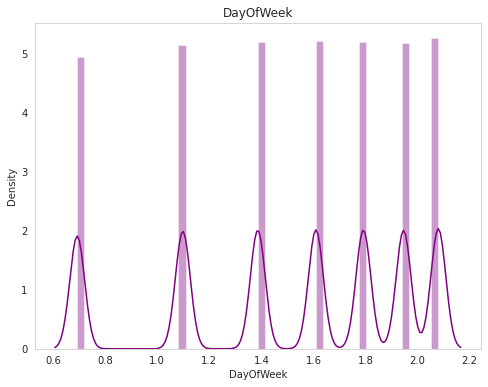

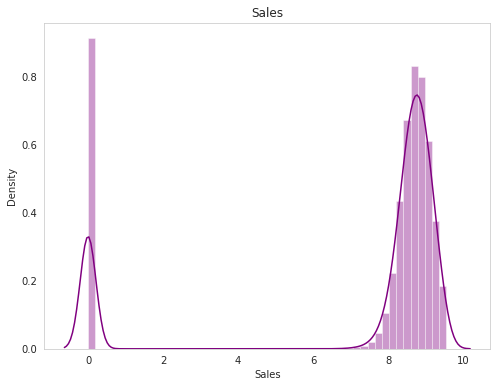

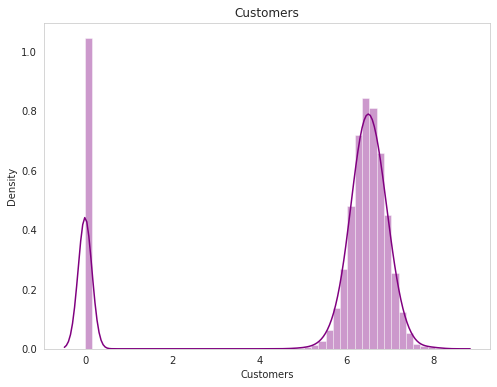

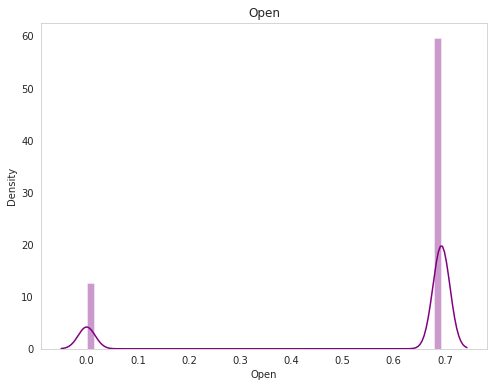

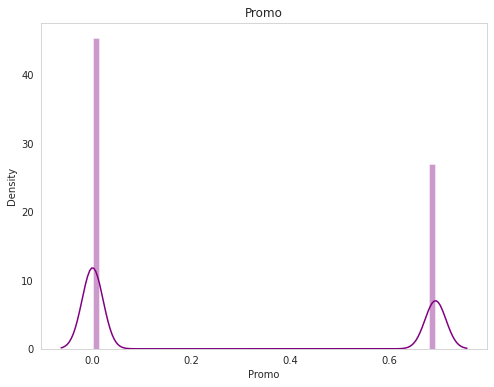

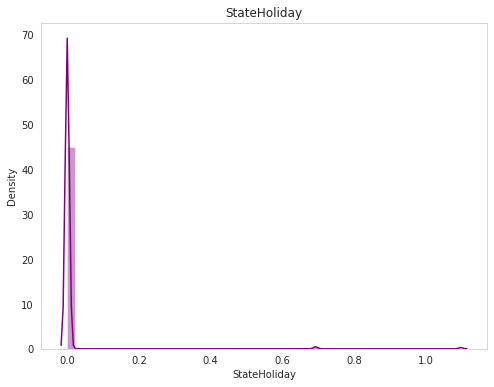

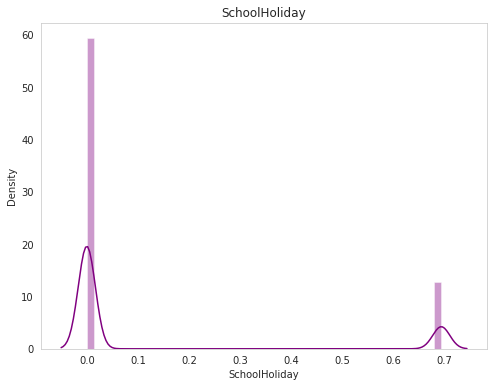

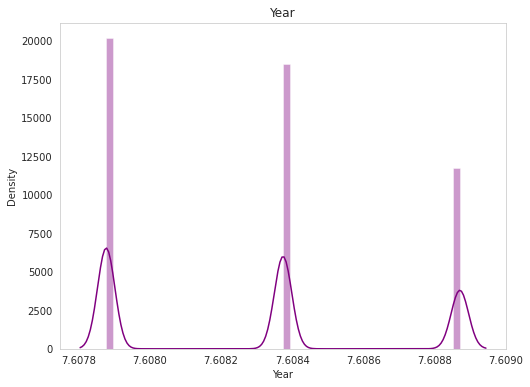

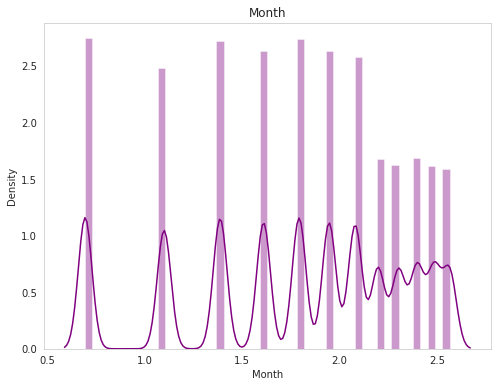

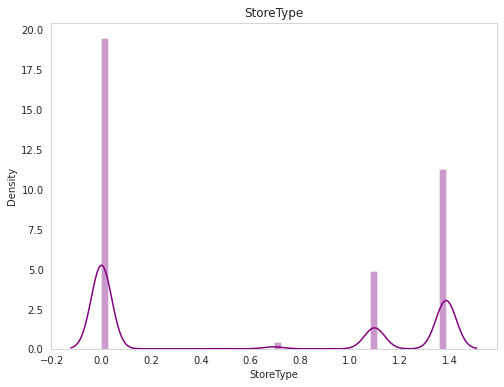

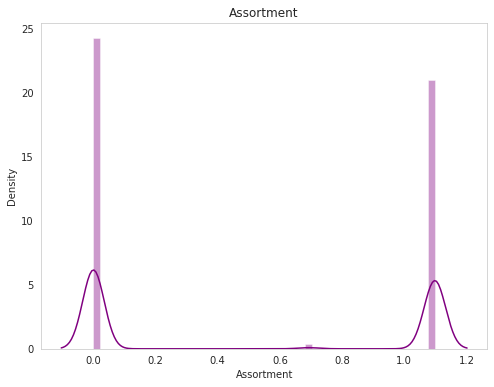

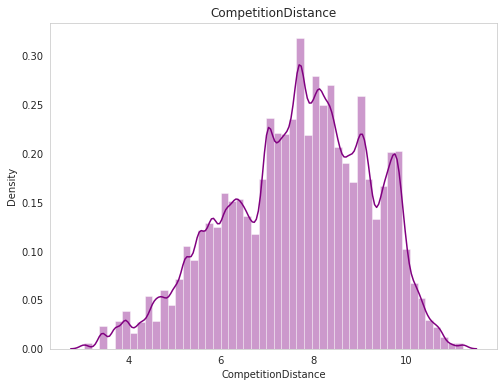

In [122]:
#Transform Your data
#printing displots to analyze the distribution of all numerical features


for col in numeric_features[1:-3]:
    fig = plt.figure(figsize=(8, 6))
    ax = fig.gca()
    feature = np.log1p(df[col])
    sns.distplot(feature, color='purple')    
    ax.set_title(col)    
    
plt.show()

### 6. Data Splitting

In [123]:
# Split your data to train and test. Choose Splitting ratio wisely.

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train.shape)
print(X_test.shape)

(792412, 13)
(198103, 13)


In [125]:
df.dtypes

Store                       int64
DayOfWeek                   int64
Sales                       int64
Customers                   int64
Open                        int64
Promo                       int64
StateHoliday                int64
SchoolHoliday               int64
Year                        int64
Month                       int64
StoreType                   int64
Assortment                  int64
CompetitionDistance         int64
Promo2                      int64
SalesPerCustomer          float64
AvgSalesPerStorePerDay    float64
dtype: object

In [126]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### What data splitting ratio have you used and why? 

* Spliting of data means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

* So we have spilting the data into 80:20 proportion

## ***6. ML Model Implementation***

### ML Model - 1. Linear Regression

In [127]:
#Evaluate Metrics

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square:', r2_square)
    print('__________________________________')

In [128]:
# fit the model 
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [129]:
# predict the model
pred = lin_reg.predict(X_test)

In [130]:
#Evaluation Metrics
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Train set evaluation:\n___________________________')
print_evaluate(y_train, train_pred)

print('Test set evaluation:\n_____________________________')
print_evaluate(y_test, test_pred)

Train set evaluation:
___________________________
MAE: 405.60459377899036
MSE: 479250.4048374258
RMSE: 692.2791379475665
R2 Square: 0.9577073711104712
__________________________________
Test set evaluation:
_____________________________
MAE: 406.55898242265414
MSE: 477129.71994515555
RMSE: 690.7457708485485
R2 Square: 0.9581319133175831
__________________________________


### ML Model - 2. Lasso Regression

In [131]:
# fit the model

lasso = Lasso(selection='random',random_state=0)
parameters = {'alpha': [1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

test_pred = lasso_regressor.predict(X_test)
train_pred = lasso_regressor.predict(X_train)

# test the model performance


print('Train set evaluation:\n_____________________________________')
zw=print_evaluate(y_train, train_pred)
print('====================================')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)

Train set evaluation:
_____________________________________
MAE: 405.60457499642257
MSE: 479250.4048376769
RMSE: 692.2791379477478
R2 Square: 0.9577073711104491
__________________________________
Test set evaluation:
_____________________________________
MAE: 406.55896371625613
MSE: 477129.7211212273
RMSE: 690.7457716998543
R2 Square: 0.9581319132143828
__________________________________
The best fit alpha value is found out to be : {'alpha': 0.0001}


### ML Model - 3. Ridge Regression

In [132]:
# implement model
ridge = Ridge(alpha=0.001, solver='cholesky', tol=0.0001, random_state=42)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)

#fit the model
test_pred = ridge.predict(X_test)
train_pred = ridge.predict(X_train)

# test on train data set
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

# test on test dataset
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)


Train set evaluation:
_____________________________________
MAE: 405.60459442572284
MSE: 479250.4048374264
RMSE: 692.2791379475669
R2 Square: 0.9577073711104712
__________________________________
Test set evaluation:
_____________________________________
MAE: 406.5589830763647
MSE: 477129.7199930782
RMSE: 690.7457708832376
R2 Square: 0.9581319133133779
__________________________________


### ML Model - 4. Decision Tree

In [133]:
#import packages
from sklearn.tree import DecisionTreeRegressor

#implement model
DT_model = DecisionTreeRegressor()
DT_model.fit(X_train,y_train)

#fit the model
test_pred = DT_model.predict(X_test)
train_pred = DT_model.predict(X_train)

# test model on train data set
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


# test model on test data set

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)


Train set evaluation:
_____________________________________
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R2 Square: 1.0
__________________________________
Test set evaluation:
_____________________________________
MAE: 15.474924660403932
MSE: 2381.0971817690797
RMSE: 48.79648739170761
R2 Square: 0.9997910589530725
__________________________________


### ML Model - 5. Random Forest

In [134]:
# model implementation
from sklearn.ensemble import RandomForestRegressor
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [25]}
rfr = RandomForestRegressor(random_state = 1)

random_forest_model= GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [135]:
# # Fit the object to train dataset
random_forest_model.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [25]},
             return_train_score=True)

In [136]:
train_pred = random_forest_model.predict(X_train)
test_pred = random_forest_model.predict(X_test)

In [137]:
# test model on train data set

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Train set evaluation:
_____________________________________
MAE: 2.9969984805883736
MSE: 120.34847861365053
RMSE: 10.970345419067284
R2 Square: 0.9999893795529601
__________________________________


In [138]:
# test model on test data set

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

Test set evaluation:
_____________________________________
MAE: 6.382022281338491
MSE: 608.5442520870457
RMSE: 24.66868971159688
R2 Square: 0.9999466003008587
__________________________________


In [139]:
LR=round(lin_reg.score(X_train,y_train)*100,2)
ls2=round(metrics.r2_score(y_train,lasso_regressor.predict(X_train))*100,2)
Rg=round(ridge.score(X_train,y_train)*100,2)
Dt=round(DT_model.score(X_train,y_train)*100,2)
Rf=round(random_forest_model.score(X_train,y_train)*100,2)


In [140]:
models =pd.DataFrame({
    'Model': ['Linear_Regression', 'Lasso_Regression','Ridge_Regression',
              'Desicion-Tree_Regression','Random_Forest'],
    'Score': [LR,ls2,Rg,Dt,Rf]})
models.sort_values(by='Score')
models
models.sort_values(by='Score',ascending=False)


,Model,Score
3,Desicion-Tree_Regression,100.00
4,Random_Forest,100.00
0,Linear_Regression,95.77
1,Lasso_Regression,95.77
2,Ridge_Regression,95.77


# **Conclusion**

***Conclusions From EDA :***

* Based on the analysis, we gained several insightful observations. Firstly, the stores tended to have a high assortment level, either by offering extra mix types of products or by extending the product range. 

* Secondly, promotions had a significant impact on sales, and customers tended to purchase more on sale days.

* Thirdly, there was a trend of individuals shopping for the end of the current month and the beginning of the following one, primarily for daily necessities. 

* Additionally, sales were higher on Mondays as compared to Sundays, and school holidays seemed to make a difference in sales. 

* Moreover, the competition level affected sales, with higher competition leading to higher sales. Finally, the months of November and December saw the highest sales, indicating that the majority of customers are likely Christians.

* These insights can assist retailers in developing effective marketing strategies and improving their product offerings to cater to customer needs.

***Conclusion From Machine Learning :***

* Firstly, we performed various regression techniques on the dataset to predict the sales. The models we used included linear regression, Lasso regression, Ridge regression, Decision Tree Regression, XGboost Regression, and Random Forest Regression.

* Secondly, we evaluated the performance of each model using the R2 metric, which measures how well the model can explain the variance in the data. We observed that the XGboost Regression model had the better performance with an R2 value of 0.988409.

* Thirdly, we applied hyperparameter tuning on all the models to improve their performance. Hyperparameter tuning is a technique used to optimize the parameters of a model to obtain the best possible results.

* Finally, after tuning the hyperparameters of all the models, we concluded that the Random Forest Regression model had the highest performance, with an R2 value of 0.994091. Random Forest Regression is an algorithm that can handle large datasets efficiently, and it provides a higher level of accuracy in predicting outcomes over any other regression algorithm.

* These insights can be helpful for businesses to predict their sales accurately, develop effective marketing strategies, and make informed decisions based on the performance of their products.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***